In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [ ]:
!kaggle datasets download -d atharv1610/terrain-recognition

Dataset URL: https://www.kaggle.com/datasets/atharv1610/terrain-recognition
License(s): unknown
100% 3.15G/3.16G [00:37<00:00, 139MB/s]
100% 3.16G/3.16G [00:37<00:00, 90.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/terrain-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
zip_ref

<zipfile.ZipFile [closed]>

In [ ]:
import pathlib
data_dir=pathlib.Path("/content/Data Main/test")

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

6769


In [ ]:
import PIL

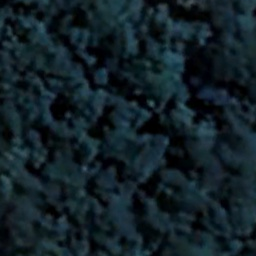

In [ ]:
M = list(data_dir.glob('Marshy/*'))
PIL.Image.open(str(M[110]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6769 files belonging to 4 classes.
Using 5416 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6769 files belonging to 4 classes.
Using 6092 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Grassy', 'Marshy', 'Rocky', 'Sandy']


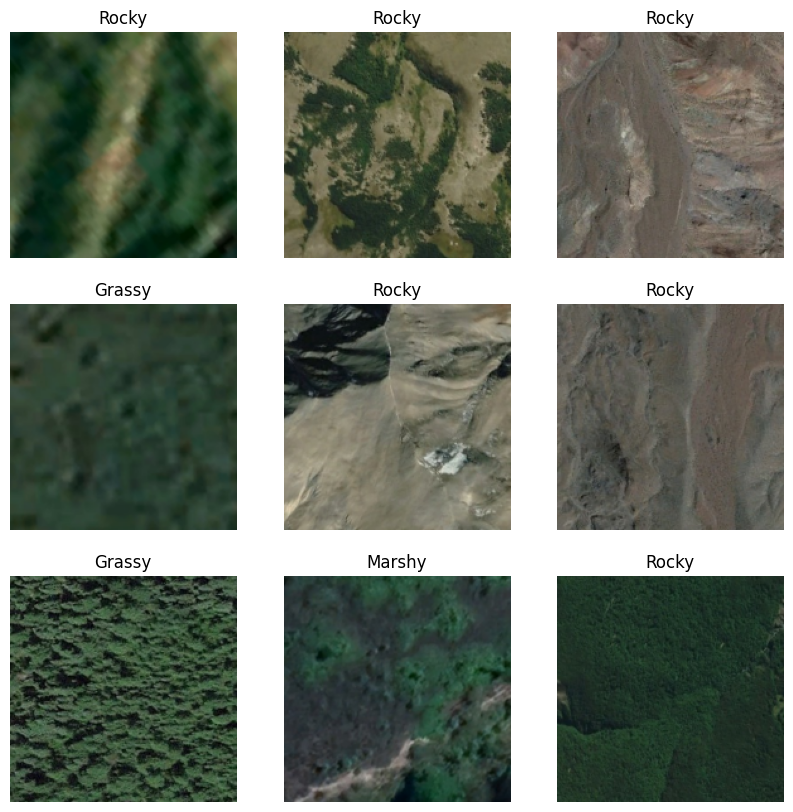

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.23416148 0.80850786


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow as tf

num_classes = 5

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


170/170 ━━━━━━━━━━━━━━━━━━━━ 71s 375ms/step - accuracy: 0.4872 - loss: 148.2894 - val_accuracy: 0.7411 - val_loss: 0.6228
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.7104 - loss: 0.7808 - val_accuracy: 0.7689 - val_loss: 0.5706
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.7576 - loss: 0.6087 - val_accuracy: 0.7283 - val_loss: 0.7286
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.7791 - loss: 0.5590 - val_accuracy: 0.7321 - val_loss: 0.6326
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7781 - loss: 0.5712 - val_accuracy: 0.8258 - val_loss: 0.4110
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8379 - loss: 0.4048 - val_accuracy: 0.8549 - val_loss: 0.3823
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8647 - loss: 0.3478 - val_accuracy: 0.8654 - val_loss: 0.3448
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.8822 - loss: 0.3149 - val_accuracy

In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [ ]:
for f in list_ds.take(5):
  print(f.numpy())

b'/content/Data Main/test/Sandy/Sandy (13)_15_27.png'
b'/content/Data Main/test/Sandy/Sandy (15)_8_29.png'
b'/content/Data Main/test/Grassy/Grassy (16)_3_30.png'
b'/content/Data Main/test/Grassy/Grassy (5)_18_13.png'
b'/content/Data Main/test/Rocky/Rocky (14)_7_8.png'


In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['Grassy' 'Marshy' 'Rocky' 'Sandy']


In [ ]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [ ]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [ ]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [ ]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [ ]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
import os

In [ ]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path,num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [ ]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  2


In [ ]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

In [ ]:
model.save("terrainExport.h5")

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'modelsave2')

['modelsave2']

In [ ]:
loaded_model2=joblib.load('/content/modelsave2')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
loaded_model2.predict(train_ds)

170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step


array([[3.04593014e-14, 7.94855297e-01, 2.05022052e-01, 1.22565209e-04,
        3.30683676e-29],
       [2.07311980e-11, 9.91167247e-01, 8.83279927e-03, 4.92391794e-10,
        1.35497544e-17],
       [2.54066462e-10, 8.99967365e-03, 9.91000354e-01, 6.98840510e-15,
        1.28733356e-27],
       ...,
       [3.12403887e-11, 9.99463022e-01, 5.12478815e-04, 2.44956027e-05,
        4.02233666e-20],
       [2.91399949e-04, 1.56415049e-02, 7.37560494e-03, 9.76691484e-01,
        3.76690920e-13],
       [1.38393855e-02, 1.33462355e-01, 3.23534086e-02, 8.20344865e-01,
        1.26036362e-10]], dtype=float32)

In [ ]:
# prompt: take input image path from the above model and predict

image_path = input('Enter image path: ')
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(180, 180, 3))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
predictions = loaded_model2.predict(img_array)
print(predictions)
predicted_class = class_names[np.argmax(predictions)]
print('Predicted class:', predicted_class)
